In [55]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("2022.xlsx", engine="openpyxl")

# Filter the data
filtered_df = df[(df['TC1'] == 358) & (df['TC1S1'] == 99)]

KeyboardInterrupt: 

In [25]:
df_copy = filtered_df.copy()

In [ ]:
# Drop unwanted columns
columns_to_drop = ['DUID', 'PID','DRUGIDX','LINKIDX','PANEL','PHARTP2','PHARTP3','PHARTP4','PHARTP5','PHARTP6','PHARTP7','PHARTP8','PHARTP9','PHARTP10','PHARTP11','RXNDC','RXRECIDX','TC3S1_1','TC3S1','TC3','TC2S2','TC2S1_2','TC2S1_1',
                   'TC2S1','TC2','TC1S3_1','TC1S3','TC1S2_1','TC1S2','TC1S1_2','RXFLG','IMPFLAG','PCIMPFLG','DIABEQUIP','INPCFLG','DUPERSID','RXNAME']
filtered_df = filtered_df.drop(columns=columns_to_drop,errors = 'ignore')

In [ ]:
top_4_drugs = filtered_df['RXDRGNAM'].value_counts().head(4)
print(top_4_drugs)

RXDRGNAM
METFORMIN           7030
INSULIN GLARGINE    1897
GLIPIZIDE           1262
SEMAGLUTIDE         1074
Name: count, dtype: int64


In [ ]:
drugs = ['METFORMIN','INSULIN GLARGINE','GLIPIZIDE','SEMAGLUTIDE']
# Keep only rows where RXDRGNAM is in the top 4
filtered_df = filtered_df[filtered_df['RXDRGNAM'].isin(drugs)]

In [ ]:
filtered_df.to_excel('2022_cleaned.xlsx',index=False)

In [ ]:
# Print number of columns left
print("Number of columns left:", len(filtered_df.columns))

# Print the remaining column names (optional)
print("Remaining columns:", filtered_df.columns.tolist())

Number of columns left: 28
Remaining columns: ['PURCHRD', 'RXBEGMM', 'RXBEGYRX', 'RXDRGNAM', 'RXQUANTY', 'RXFORM', 'RXFRMUNT', 'RXSTRENG', 'RXSTRUNT', 'RXDAYSUP', 'PHARTP1', 'TC1', 'TC1S1', 'TC1S1_1', 'RXSF22X', 'RXMR22X', 'RXMD22X', 'RXPV22X', 'RXVA22X', 'RXTR22X', 'RXOF22X', 'RXSL22X', 'RXWC22X', 'RXOT22X', 'RXXP22X', 'PERWT22F', 'VARSTR', 'VARPSU']


In [40]:
# Define the years and the columns you want to drop
years = range(2017, 2022)  # From 2017 to 2021

columns_to_drop = ['DUID', 'PID','DRUGIDX','LINKIDX','PANEL','RXNDC','RXRECIDX','TC3S1_1','TC3S1','TC3','TC2S2','TC2S1_2','TC2S1_1',
                   'TC2S1','TC2','TC1S3_1','TC1S3','TC1S2_1','TC1S2','TC1S1_2','RXFLG','IMPFLAG','PCIMPFLG','DIABEQUIP','INPCFLG','DUPERSID']

for year in years:
    filename = f"{year}.xlsx"
    print(f"Processing {filename}...")

    # Read the Excel file
    df = pd.read_excel(filename)

    # Filter rows where TC1 == 358 and TC1S1 == 99
    filtered_df = df[(df['TC1'] == 358) & (df['TC1S1'] == 99)]

    # Drop unwanted columns (ignore if they don't exist)
    filtered_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')
    
    # Filter rows to only keep top drugs
    filtered_df = filtered_df[filtered_df['RXDRGNAM'].isin(drugs)]
    
    # Save to a new file with _cleaned suffix
    output_filename = filename.replace('.xlsx', '_cleaned.xlsx')
    filtered_df.to_excel(output_filename, index=False)

    print(f"Finished: {output_filename}")

print("All years processed successfully!")

Processing 2017.xlsx...
Finished: 2017_cleaned.xlsx
Processing 2018.xlsx...
Finished: 2018_cleaned.xlsx
Processing 2019.xlsx...
Finished: 2019_cleaned.xlsx
Processing 2020.xlsx...
Finished: 2020_cleaned.xlsx
Processing 2021.xlsx...
Finished: 2021_cleaned.xlsx
All years processed successfully!


In [ ]:
import re
years = range(2017, 2023)
df_list = []

# Define a mapping pattern: strip digits from columns like RXSF22X → RXSF
consolidate_columns = [
    'RXSF', 'RXMR', 'RXMD', 'RXPV', 'RXVA', 'RXTR', 'RXOF',
    'RXSL', 'RXWC', 'RXOT', 'RXXP', 'PERWT'
]

for year in years:
    filename = f"{year}_cleaned.xlsx"
    print(f"Processing {filename}...")

    df = pd.read_excel(filename)
    df['YEAR'] = year

    # Standardize column names like RXSF22X → RXSF
    for col in df.columns:
        for base in consolidate_columns:
            if re.fullmatch(f"{base}\d{{2}}X", col):
                df = df.rename(columns={col: base})

    df_list.append(df)

# Combine all into one DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Save to Excel
combined_df.to_excel("data.xlsx", index=False)

print(" cleaned data file saved.")

Processing 2017_cleaned.xlsx...
Processing 2018_cleaned.xlsx...
Processing 2019_cleaned.xlsx...
Processing 2020_cleaned.xlsx...
Processing 2021_cleaned.xlsx...
Processing 2022_cleaned.xlsx...
 cleaned data file saved.


In [56]:
combined_df = pd.read_excel("data.xlsx")

In [57]:
print(combined_df.shape)

(76307, 51)


In [67]:
# Final columns (standardized)
columns_to_keep = [
    'PURCHRD', 'RXBEGMM', 'RXBEGYRX', 'RXDRGNAM', 'RXQUANTY', 'RXFORM',
    'RXFRMUNT', 'RXSTRENG', 'RXSTRUNT', 'RXDAYSUP', 'PHARTP1',
    'TC1', 'TC1S1', 'TC1S1_1',
    'RXSF', 'RXMR', 'RXMD', 'RXPV', 'RXVA', 'RXTR', 'RXOF',
    'RXSL', 'RXWC', 'RXOT', 'RXXP', 'PERWT', 'VARSTR', 'VARPSU','YEAR','PERWT'
]

# Keep only relevant columns
filtered_combined_df = combined_df[[col for col in columns_to_keep if col in combined_df.columns]]

# Save to Excel
filtered_combined_df.to_excel("final_filtered_data.xlsx", index=False)


In [131]:
import pandas as pd
df = pd.read_excel("final_filtered_data.xlsx")

In [135]:

selected_cols = [
    'RXFORM',     # Dosage form (e.g., TABS, TB24)
    'RXSTRENG',   # Strength of medication (e.g., 500)
    'RXFRMUNT',   # Quantity unit (e.g., EA)
    'RXDAYSUP',   # Days supplied (e.g., 30, 90)
    'TC1S1_1',   # Therapeutic sub-sub-class
    'YEAR',        # Year
    'RXQUANTY',   # Quantity of medication
    'RXXP',
    'RXDRGNAM',
    'RXSF', 'RXMR', 'RXMD', 'RXPV', 'RXVA', 'RXTR', 'RXOF',
    'RXSL', 'RXWC', 'RXOT',
]
# View only selected x_j columns
xj_df = df[selected_cols]
xj_df['consumer_price'] = xj_df['RXSF']
xj_df['insurance_payment'] = xj_df['RXXP'] - xj_df['RXSF']

# clearly define insured dummy: insured if more than 50% of total payment is covered by insurance
xj_df['insured'] = (xj_df['insurance_payment'] >= 0.5 * xj_df['RXXP']).astype(int)
# Show the first few rows
xj_df.head(20)


C:\Users\logc0\AppData\Local\Temp\ipykernel_2092\1629816932.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xj_df['consumer_price'] = xj_df['RXSF']
C:\Users\logc0\AppData\Local\Temp\ipykernel_2092\1629816932.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xj_df['insurance_payment'] = xj_df['RXXP'] - xj_df['RXSF']
C:\Users\logc0\AppData\Local\Temp\ipykernel_2092\1629816932.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,RXFORM,RXSTRENG,RXFRMUNT,RXDAYSUP,TC1S1_1,YEAR,RXQUANTY,RXXP,RXDRGNAM,RXSF,...,RXPV,RXVA,RXTR,RXOF,RXSL,RXWC,RXOT,consumer_price,insurance_payment,insured
0,TABS,500,EA,30,214,2017,30.0,0.00,METFORMIN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
1,TABS,500,EA,30,214,2017,30.0,0.00,METFORMIN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
2,TABS,500,EA,30,214,2017,30.0,0.00,METFORMIN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
3,TABS,500,EA,30,214,2017,30.0,0.00,METFORMIN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
4,TABS,500,EA,30,214,2017,30.0,0.00,METFORMIN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
5,TABS,500,EA,30,214,2017,30.0,0.00,METFORMIN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
6,TABS,500,EA,30,214,2017,30.0,0.00,METFORMIN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
7,TABS,500,EA,30,214,2017,30.0,0.00,METFORMIN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
8,TABS,500,EA,30,214,2017,30.0,0.00,METFORMIN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
9,TABS,500,EA,30,214,2017,30.0,0.00,METFORMIN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1


In [75]:
print(xj_df['RXFRMUNT'].value_counts())


RXFRMUNT
EA             58329
ML             15570
-15             1759
TAB              599
-8                26
OTHER              8
NDL                6
INH                4
Pen needles        3
Device             2
G                  1
Name: count, dtype: int64


In [136]:
import numpy as np
# Replace special codes in RXFRMUNT (e.g., -8 = DK, -15 = Cannot be computed)
xj_df['RXFRMUNT'] = xj_df['RXFRMUNT'].replace({-8: 'UNKNOWN', -15: 'UNKNOWN'}).astype(str)

# Handle missing days supplied (-8 = DK)
xj_df['RXDAYSUP'] = xj_df['RXDAYSUP'].replace(-8, np.nan)
xj_df['RXDAYSUP'] = xj_df['RXDAYSUP'].fillna(xj_df['RXDAYSUP'].median())

# ----------------------------
# Step 3: One-hot encode categorical variables
# ----------------------------
xj_df = pd.get_dummies(xj_df, columns=['RXFORM', 'RXFRMUNT', 'TC1S1_1'], drop_first=True)

# ----------------------------
# Step 4: Final preview
# ----------------------------
print(xj_df.head())
print(f"\nCleaned dataset shape: {xj_df.shape}")

xj_df.to_excel("logit.xlsx",index=False)

C:\Users\logc0\AppData\Local\Temp\ipykernel_2092\1944814938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xj_df['RXFRMUNT'] = xj_df['RXFRMUNT'].replace({-8: 'UNKNOWN', -15: 'UNKNOWN'}).astype(str)
C:\Users\logc0\AppData\Local\Temp\ipykernel_2092\1944814938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xj_df['RXDAYSUP'] = xj_df['RXDAYSUP'].replace(-8, np.nan)
C:\Users\logc0\AppData\Local\Temp\ipykernel_2092\1944814938.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

  RXSTRENG  RXDAYSUP  YEAR  RXQUANTY  RXXP   RXDRGNAM  RXSF  RXMR  RXMD  RXPV  \
0      500      30.0  2017      30.0   0.0  METFORMIN   0.0   0.0   0.0   0.0   
1      500      30.0  2017      30.0   0.0  METFORMIN   0.0   0.0   0.0   0.0   
2      500      30.0  2017      30.0   0.0  METFORMIN   0.0   0.0   0.0   0.0   
3      500      30.0  2017      30.0   0.0  METFORMIN   0.0   0.0   0.0   0.0   
4      500      30.0  2017      30.0   0.0  METFORMIN   0.0   0.0   0.0   0.0   

   ...  RXFRMUNT_G  RXFRMUNT_INH  RXFRMUNT_ML  RXFRMUNT_NDL  RXFRMUNT_OTHER  \
0  ...       False         False        False         False           False   
1  ...       False         False        False         False           False   
2  ...       False         False        False         False           False   
3  ...       False         False        False         False           False   
4  ...       False         False        False         False           False   

   RXFRMUNT_Pen needles  RXFRMUNT_TAB 

In [2]:
import pandas as pd
df = pd.read_stata("logit1.dta")
#df.to_csv('model.csv',index=False)
df.head()

,YEAR,all_share,s0,RXDRGNAM,freq,market_size,market_share,RXSTRENG,strength,RXDAYSUP,...,TC1S1_1_373,log_share_ratio,_IYEAR_2018,_IYEAR_2019,_IYEAR_2020,_IYEAR_2021,_IYEAR_2022,_IRXDRGNAM_2,_IRXDRGNAM_3,_IRXDRGNAM_4
0,2017,0.499113,0.500887,INSULIN GLARGINE,2261.0,24814.0,0.091118,100/3,NaN,84,...,0,-1.704225,0,0,0,0,0,1,0,0
1,2018,0.505651,0.494349,GLIPIZIDE,1794.0,26190.0,0.068499,10,10.0,30,...,0,-1.976416,1,0,0,0,0,0,0,0
2,2019,0.511955,0.488045,METFORMIN,8553.0,23797.0,0.359415,500,500.0,90,...,0,-0.305929,0,1,0,0,0,0,1,0
3,2020,0.508364,0.491636,METFORMIN,9008.0,25466.0,0.353727,500,500.0,90,...,0,-0.329214,0,0,1,0,0,0,1,0
4,2021,0.475425,0.524575,METFORMIN,9398.0,30051.0,0.312735,500,500.0,90,...,0,-0.517232,0,0,0,1,0,0,1,0


In [3]:
ds = pd.read_excel("logit.xlsx")
ds.head()

,RXSTRENG,RXDAYSUP,YEAR,RXQUANTY,RXXP,RXDRGNAM,RXSF,RXMR,RXMD,RXPV,...,RXFRMUNT_G,RXFRMUNT_INH,RXFRMUNT_ML,RXFRMUNT_NDL,RXFRMUNT_OTHER,RXFRMUNT_Pen needles,RXFRMUNT_TAB,TC1S1_1_214,TC1S1_1_215,TC1S1_1_373
0,500,30,2017,30.0,0.0,METFORMIN,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
1,500,30,2017,30.0,0.0,METFORMIN,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
2,500,30,2017,30.0,0.0,METFORMIN,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
3,500,30,2017,30.0,0.0,METFORMIN,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
4,500,30,2017,30.0,0.0,METFORMIN,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False


In [4]:
cols_to_merge = [
    'RXSF', 'RXMR', 'RXMD', 'RXPV', 'RXVA', 'RXTR', 'RXOF', 
    'RXSL', 'RXWC', 'RXOT', 'consumer_price', 'insurance_payment', 'insured'
]

# Make sure all columns exist in ds
cols_to_merge = [col for col in cols_to_merge if col in ds.columns]

# Merge them into df
df_merged = pd.concat([df.reset_index(drop=True), ds[cols_to_merge].reset_index(drop=True)], axis=1)
print(df_merged.columns)


Index(['YEAR', 'all_share', 's0', 'RXDRGNAM', 'freq', 'market_size',
       'market_share', 'RXSTRENG', 'strength', 'RXDAYSUP', 'RXQUANTY', 'RXXP',
       'RXFORM_CER', 'RXFORM_CRE', 'RXFORM_INJ', 'RXFORM_IV', 'RXFORM_Lancets',
       'RXFORM_OTHER', 'RXFORM_SOAJ', 'RXFORM_SOL', 'RXFORM_SOLN',
       'RXFORM_SOPN', 'RXFORM_SRN', 'RXFORM_TAB', 'RXFORM_TABS', 'RXFORM_TB24',
       'RXFORM_TEF', 'RXFRMUNT_8', 'RXFRMUNT_Device', 'RXFRMUNT_EA',
       'RXFRMUNT_G', 'RXFRMUNT_INH', 'RXFRMUNT_ML', 'RXFRMUNT_NDL',
       'RXFRMUNT_OTHER', 'RXFRMUNT_Penneedles', 'RXFRMUNT_TAB', 'TC1S1_1_214',
       'TC1S1_1_215', 'TC1S1_1_373', 'log_share_ratio', '_IYEAR_2018',
       '_IYEAR_2019', '_IYEAR_2020', '_IYEAR_2021', '_IYEAR_2022',
       '_IRXDRGNAM_2', '_IRXDRGNAM_3', '_IRXDRGNAM_4', 'RXSF', 'RXMR', 'RXMD',
       'RXPV', 'RXVA', 'RXTR', 'RXOF', 'RXSL', 'RXWC', 'RXOT',
       'consumer_price', 'insurance_payment', 'insured'],
      dtype='object')


In [10]:
!pip install linearmodels
import numpy as np
from linearmodels.iv import IV2SLS
import pandas as pd

# Replace with your actual DataFrame
# df = pd.read_csv("your_data.csv")
df = df_merged.copy()
# Step 1: Construct instruments for consumer_price
df['mean_strength'] = np.nan
df['mean_daysup'] = np.nan

for year in df['YEAR'].unique():
    for prod in df[df['YEAR'] == year]['RXDRGNAM'].unique():
        others = (df['YEAR'] == year) & (df['RXDRGNAM'] != prod)
        mean_s = df.loc[others, 'strength'].mean()
        mean_d = df.loc[others, 'RXDAYSUP'].mean()

        mask = (df['YEAR'] == year) & (df['RXDRGNAM'] == prod)
        df.loc[mask, 'mean_strength'] = mean_s
        df.loc[mask, 'mean_daysup'] = mean_d

# Step 2: Drop missing
required_cols = [
    'log_share_ratio', 'consumer_price', 'RXQUANTY',
    'mean_strength', 'mean_daysup'
]
df_clean = df.dropna(subset=required_cols)

# Step 3: 2SLS model (treat consumer_price as endogenous)
iv = IV2SLS.from_formula(
    '''
    log_share_ratio ~ 1 + RXQUANTY + strength + RXDAYSUP
    + RXFORM_CER + RXFORM_CRE + RXFORM_INJ + RXFORM_IV + RXFORM_Lancets
    + RXFORM_OTHER + RXFORM_SOAJ + RXFORM_SOL + RXFORM_SOLN + RXFORM_SOPN
    + RXFORM_SRN + RXFORM_TAB + RXFORM_TABS + RXFORM_TB24 + RXFORM_TEF
    + [consumer_price ~ mean_strength + mean_daysup]
    ''',
    data=df_clean
).fit(cov_type='robust')

# Step 4: Export results
with open("iv_regression_final.txt", "w") as f:
    f.write(iv.summary.as_text())

print(iv.summary)


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 87.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 26.8 MB/s eta 0:00:00


c:\Users\logc0\anaconda3\envs\hw6\lib\site-packages\linearmodels\iv\model.py:557: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(


ValueError: regressors [exog endog] do not have full column rank

In [12]:
df_for_check = pd.concat([endog, exog, instruments], axis=1)
corr_matrix = df_for_check.corr()
print(corr_matrix)

NameError: name 'endog' is not defined

In [179]:
# Step 1: Create the suggested price dataset with both total and out-of-pocket prices
suggested_price_data = {
    'RXDRGNAM': ['METFORMIN', 'INSULIN GLARGINE', 'GLIPIZIDE', 'SEMAGLUTIDE'],
    '2017_total': [39.12, 544.82, 17.63, None],
    '2017_oop': [4.47, 38.87, 4.98, None],
    '2018_total': [29.76, 563.85, 16.47, 1871.83],
    '2018_oop': [4.81, 40.53, 5.19, 37.12],
    '2019_total': [20.82, 538.66, 15.45, 1011.14],
    '2019_oop': [4.23, 37.91, 4.33, 3.97],
    '2020_total': [11.07, 486.52, 11.87, 1486.35],
    '2020_oop': [4.23, 43.62, 5.06, 50.83],
    '2021_total': [61.58, 562.27, 13.94, 1403.16],
    '2021_oop': [4.40, 36.17, 5.11, 59.58],
    '2022_total': [70.33, 508.95, 15.53, 1392.36],
    '2022_oop': [4.34, 40.40, 4.90, 44.10],
}

# Step 2: Convert to long format
suggested_df = pd.DataFrame(suggested_price_data)

# Extract total prices
total = suggested_df.melt(id_vars='RXDRGNAM', value_name='suggested_total_price')
total = total[total['variable'].str.contains('total')]
total['YEAR'] = total['variable'].str.extract(r'(\d+)').astype(int)
total.drop(columns='variable', inplace=True)

# Extract out-of-pocket (consumer) prices
oop = suggested_df.melt(id_vars='RXDRGNAM', value_name='suggested_consumer_price')
oop = oop[oop['variable'].str.contains('oop')]
oop['YEAR'] = oop['variable'].str.extract(r'(\d+)').astype(int)
oop.drop(columns='variable', inplace=True)

# Merge both on drug name and year
suggested_prices = pd.merge(total, oop, on=['RXDRGNAM', 'YEAR'], how='outer')

# Step 3: Merge with your original dataframe
df = df.merge(suggested_prices, on=['RXDRGNAM', 'YEAR'], how='left')

In [14]:
df.head()

,YEAR,all_share,s0,RXDRGNAM,freq,market_size,market_share,RXSTRENG,strength,RXDAYSUP,...,TC1S1_1_373,log_share_ratio,_IYEAR_2018,_IYEAR_2019,_IYEAR_2020,_IYEAR_2021,_IYEAR_2022,_IRXDRGNAM_2,_IRXDRGNAM_3,_IRXDRGNAM_4
0,2017,0.499113,0.500887,INSULIN GLARGINE,2261.0,24814.0,0.091118,100/3,NaN,84,...,0,-1.704225,0,0,0,0,0,1,0,0
1,2018,0.505651,0.494349,GLIPIZIDE,1794.0,26190.0,0.068499,10,10.0,30,...,0,-1.976416,1,0,0,0,0,0,0,0
2,2019,0.511955,0.488045,METFORMIN,8553.0,23797.0,0.359415,500,500.0,90,...,0,-0.305929,0,1,0,0,0,0,1,0
3,2020,0.508364,0.491636,METFORMIN,9008.0,25466.0,0.353727,500,500.0,90,...,0,-0.329214,0,0,1,0,0,0,1,0
4,2021,0.475425,0.524575,METFORMIN,9398.0,30051.0,0.312735,500,500.0,90,...,0,-0.517232,0,0,0,1,0,0,1,0


In [180]:
print(df.columns)

Index(['YEAR', 'all_share', 's0', 'RXDRGNAM', 'freq', 'market_size',
       'market_share', 'RXSTRENG', 'strength', 'RXDAYSUP', 'RXQUANTY', 'RXXP',
       'RXFORM_CER', 'RXFORM_CRE', 'RXFORM_INJ', 'RXFORM_IV', 'RXFORM_Lancets',
       'RXFORM_OTHER', 'RXFORM_SOAJ', 'RXFORM_SOL', 'RXFORM_SOLN',
       'RXFORM_SOPN', 'RXFORM_SRN', 'RXFORM_TAB', 'RXFORM_TABS', 'RXFORM_TB24',
       'RXFORM_TEF', 'RXFRMUNT_8', 'RXFRMUNT_Device', 'RXFRMUNT_EA',
       'RXFRMUNT_G', 'RXFRMUNT_INH', 'RXFRMUNT_ML', 'RXFRMUNT_NDL',
       'RXFRMUNT_OTHER', 'RXFRMUNT_Penneedles', 'RXFRMUNT_TAB', 'TC1S1_1_214',
       'TC1S1_1_215', 'TC1S1_1_373', 'log_share_ratio', '_IYEAR_2018',
       '_IYEAR_2019', '_IYEAR_2020', '_IYEAR_2021', '_IYEAR_2022',
       '_IRXDRGNAM_2', '_IRXDRGNAM_3', '_IRXDRGNAM_4', 'suggested_total_price',
       'suggested_consumer_price'],
      dtype='object')


In [120]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Assuming your main dataframe is already named df, and that:
# 1. df has the computed dependent variable 'log_share_ratio' = log(s_j) - log(s0)
# 2. df has the continuous variables: 'RXXP', 'strength', 'RXDAYSUP', 'RXQUANTY'
# 3. df has several dummy variables for drug forms starting with "RXFORM_"
# 4. You have created year dummies (e.g. by pd.get_dummies on the 'YEAR' column, with prefix 'YEAR_')

# For example, if not already done, create year dummies (dropping one as the base):
df = pd.get_dummies(df, columns=['YEAR'], prefix='YEAR', drop_first=True)

# Dynamically select all dummy variables for drug forms.
dummy_cols = [col for col in df.columns if col.startswith('RXFORM_')]

# Dynamically select year dummy columns (assuming they start with "YEAR_")
year_dummy_cols = [col for col in df.columns if col.startswith('_IYEAR_')]

# Define the list of continuous explanatory variables.
cont_vars = ['RXXP', 'strength', 'RXDAYSUP', 'RXQUANTY']

# Combine all regressors into one list.
all_regressors = cont_vars + dummy_cols + year_dummy_cols

# Construct the regression formula:
formula = 'log_share_ratio ~ ' + ' + '.join(all_regressors)

# Run the regression model.
model = smf.ols(formula=formula, data=df).fit()

# Output the regression summary.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        log_share_ratio   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     9216.
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:52:35   Log-Likelihood:                -29670.
No. Observations:               73870   AIC:                         5.939e+04
Df Residuals:                   73847   BIC:                         5.960e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.3035      0.137     -9.

In [213]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[all_regressors].copy()  # or your list of features
X = X.dropna()  # remove missing values
X = X.select_dtypes(include=['number'])  # keep only numeric columns
X = add_constant(X)

# Compute VIF
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif.sort_values(by="VIF", ascending=False))# Step 1: Create figure and axis
fig, ax = plt.subplots(figsize=(8, len(vif) * 0.4))  # adjust height dynamically
ax.axis('off')  # No axis

# Step 2: Create table
table = ax.table(cellText=vif.values,
                 colLabels=vif.columns,
                 cellLoc='center',
                 loc='center')

# Optional: Tweak appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.4)

# Step 3: Save as PNG
plt.savefig("vif_table_full.png", bbox_inches='tight', dpi=300)
plt.show()

KeyError: "['consumer_price', 'insured'] not in index"

In [122]:
# Step 1: Check if column is constant
for col in ['RXFORM_SRN', 'RXFORM_SOAJ']:
    print(f"{col} unique values:", df[col].unique())
    print(f"{col} value counts:\n", df[col].value_counts(), "\n")

# Step 2: Check missing values
print(df[['RXFORM_SRN', 'RXFORM_SOAJ']].isnull().sum())

# Step 3: Check collinearity (pairwise correlation)
print(df[['RXFORM_SRN', 'RXFORM_SOAJ']].corr())

RXFORM_SRN unique values: [0 1]
RXFORM_SRN value counts:
 RXFORM_SRN
0    76303
1        4
Name: count, dtype: int64 

RXFORM_SOAJ unique values: [0 1]
RXFORM_SOAJ value counts:
 RXFORM_SOAJ
0    76241
1       66
Name: count, dtype: int64 

RXFORM_SRN     0
RXFORM_SOAJ    0
dtype: int64
             RXFORM_SRN  RXFORM_SOAJ
RXFORM_SRN     1.000000    -0.000213
RXFORM_SOAJ   -0.000213     1.000000


In [5]:
import pandas as pd
df_merged.to_csv('logit.csv',index=False)

In [214]:

import statsmodels.formula.api as smf

# Step 1: Drop high-VIF or sparse variables
to_drop = [
    'RXFORM_TABS', 'RXFORM_TB24', 'RXFORM_SOPN',
    'RXFORM_SOLN', 'RXFORM_TEF', 'RXFORM_IV',
    'RXFORM_SOA3', 'RXFORM_SRN'
]

df_merged = df_merged.drop(columns=to_drop,errors='ignore')

# Step 2: Rebuild your list of regressors
cont_vars = ['consumer_price', 'strength', 'RXDAYSUP', 'RXQUANTY']
form_dummies = [col for col in df.columns if col.startswith('RXFORM_')]
year_dummies = [col for col in df.columns if col.startswith('_IYEAR_')]
drug_dummies = [col for col in df.columns if col.startswith('_IRXDRGNAM_')]
class_dummies = [col for col in df_merged.columns if col.startswith('TC1S1_1_')]
unit_dummies = [col for col in df_merged.columns if col.startswith('RXFRMUNT_')]

all_regressors = cont_vars + form_dummies + year_dummies + drug_dummies+class_dummies+unit_dummies

# Step 3: Build the regression formula
formula = 'log_share_ratio ~ ' + ' + '.join(all_regressors)

# Step 4: Run the regression
model = smf.ols(formula=formula, data=df_merged).fit()
# Get the summary text
summary_text = model.summary().as_text()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 14))  # Adjust size as needed
ax.axis('off')  # No axis

# Set white background
fig.patch.set_facecolor('white')

# Display the summary as monospace text
ax.text(0, 1, summary_text, fontsize=10, fontfamily='monospace', va='top')

# Save as PNG with white background
plt.savefig("regression_summary_white_bg2.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.close()

# Step 5: Output complete summary to a txt file
with open("pooled_regression_summary.txt", "w") as f:
    f.write(model.summary().as_text())

In [211]:
import statsmodels.formula.api as smf
import numpy as np

df_merged = df_merged.drop(columns="RXFORM_SRN",errors='ignore')
# Step 2: Rebuild your list of regressors
cont_vars = ['consumer_price', 'strength', 'RXDAYSUP', 'RXQUANTY']
form_dummies = [col for col in df_merged.columns if col.startswith('RXFORM_')]
year_dummies = [col for col in df_merged.columns if col.startswith('_IYEAR_')]
drug_dummies = [col for col in df_merged.columns if col.startswith('_IRXDRGNAM_')]
unit_dummies = [col for col in df_merged.columns if col.startswith('RXFRMUNT_')]
class_dummies = [col for col in df_merged.columns if col.startswith('TC1S1_1_')]

insurance_dummies = ['insured']

all_regressors = cont_vars + form_dummies + year_dummies + drug_dummies + insurance_dummies+unit_dummies+class_dummies

# Step 3: Build the regression formula
formula = 'log_share_ratio ~ ' + ' + '.join(all_regressors)

# Step 4: Run the regression
model = smf.ols(formula=formula, data=df_merged).fit()

# Step 5: Output complete summary to a txt file
with open("pooled_regression_summary_2.txt", "w") as f:
    f.write(model.summary().as_text())
    
# Get the summary text
summary_text = model.summary().as_text()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 14))  # Adjust size as needed
ax.axis('off')  # No axis

# Set white background
fig.patch.set_facecolor('white')

# Display the summary as monospace text
ax.text(0, 1, summary_text, fontsize=10, fontfamily='monospace', va='top')

# Save as PNG with white background
plt.savefig("regression_summary_white_bg.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.close()
    
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_merged[all_regressors].copy()  # or your list of features
X = X.dropna()  # remove missing values
X = X.select_dtypes(include=['number'])  # keep only numeric columns
X = add_constant(X)

# Compute VIF
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\

threshold = 10  # You can change this to 5, 20, etc.
high_vif = vif[vif["VIF"] > threshold]
print(high_vif.sort_values(by="VIF", ascending=False))


c:\Users\logc0\anaconda3\envs\hw6\lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\logc0\anaconda3\envs\hw6\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


  feature        VIF
0   const  14.705662


In [166]:

# === Step 1: Extract coefficients ===
coeff_dict = model.params.to_dict()
alpha = -coeff_dict['consumer_price']  # should be positive

# Get list of X variables used in utility
X_vars = [col for col in coeff_dict if col != 'Intercept']

# === Step 2: Compute V_jt = X_jt · β ===
df_merged['V'] = df_merged[X_vars].dot([coeff_dict[col] for col in X_vars])

# === Step 3: Calculate log-sum for each year ===
logsum_by_year = df_merged.groupby('YEAR')['V'].apply(lambda v: np.log(np.exp(v).sum())).reset_index()
logsum_by_year.columns = ['YEAR', 'logsum']

# === Step 4: Calculate consumer surplus (drop constants) ===
logsum_by_year['consumer_surplus'] = logsum_by_year['logsum'] / alpha

# === Step 5: Output results
print(logsum_by_year)
print(alpha)

   YEAR     logsum  consumer_surplus
0  2017  10.757275      2.464688e+06
1  2018  10.833455      2.482142e+06
2  2019  10.812444      2.477329e+06
3  2020  10.829636      2.481268e+06
4  2021  10.722059      2.456620e+06
5  2022  10.476133      2.400274e+06
4.364557923906874e-06


In [215]:
# Create counterfactual dataset where everyone is insured
cf_df = df_merged.copy()
# Predict utility under full insurance
cf_df['v_j_cf'] = model.predict(cf_df)

# Group and compute logsum
logsum_cf = cf_df.groupby('YEAR')['v_j_cf'].apply(lambda x: np.log(np.sum(np.exp(x))))

# Convert to DataFrame with proper column name
cs_cf_df = logsum_cf.reset_index(name='logsum_cf')

# Compute consumer surplus
alpha = -coeff_dict['consumer_price']  # should be positive
cs_cf_df['consumer_surplus_cf'] = cs_cf_df['logsum_cf'] / alpha

# Show result
print(cs_cf_df.head(6))

KeyError: 'consumer_price'

In [178]:
delta_cs = cs_cf_df['consumer_surplus_cf'] - logsum_by_year['consumer_surplus']
delta_cs.name = 'CS_gain_from_insurance'
print(delta_cs)

0   -460363.952551
1   -460363.952551
2   -460363.952551
3   -460363.952551
4   -460363.952551
5   -460363.952551
Name: CS_gain_from_insurance, dtype: float64


In [150]:
form_dummies = [col for col in df_merged.columns if col.startswith('RXFORM_')]
print(form_dummies)


['RXFORM_CER', 'RXFORM_CRE', 'RXFORM_INJ', 'RXFORM_Lancets', 'RXFORM_OTHER', 'RXFORM_SOAJ', 'RXFORM_SOL', 'RXFORM_TAB']


     RXDRGNAM  YEAR  consumer_price  suggested_consumer_price  \
13  METFORMIN  2018       13.729804                      4.81   
16  METFORMIN  2021       12.063278                      4.40   
17  METFORMIN  2022       11.783982                      4.34   
5   GLIPIZIDE  2022       12.086918                      4.90   
1   GLIPIZIDE  2018       11.873506                      5.19   
4   GLIPIZIDE  2021       11.319093                      5.11   
2   GLIPIZIDE  2019       10.518443                      4.33   
12  METFORMIN  2017       10.615266                      4.47   
15  METFORMIN  2020       10.085112                      4.23   
14  METFORMIN  2019        9.960092                      4.23   

    discrimination_gap  
13            8.919804  
16            7.663278  
17            7.443982  
5             7.186918  
1             6.683506  
4             6.209093  
2             6.188443  
12            6.145266  
15            5.855112  
14            5.730092  


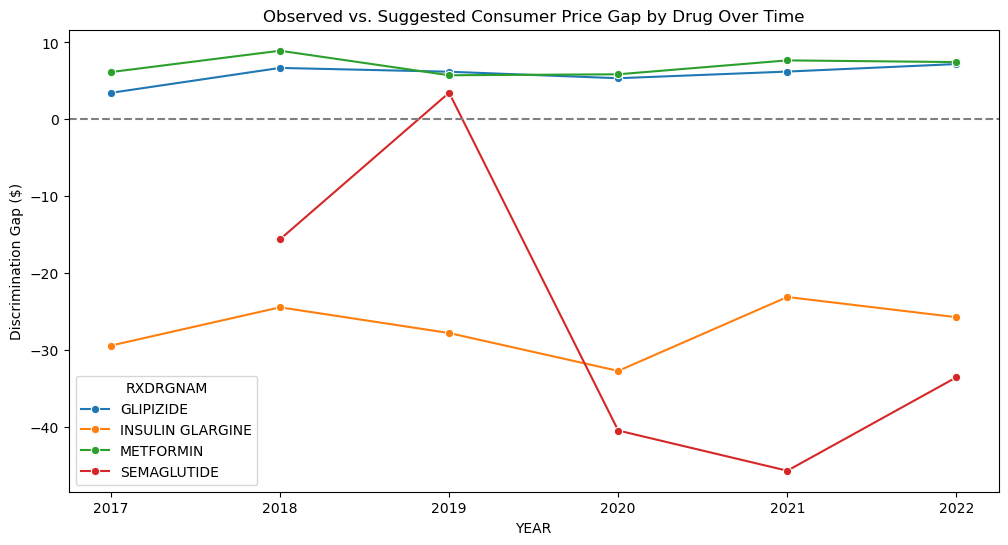

In [185]:
df_merged['discrimination_gap'] = df_merged['consumer_price'] - df_merged['suggested_consumer_price']
# Group by drug and year
gap_stats = df_merged.groupby(['RXDRGNAM', 'YEAR'])[['consumer_price', 'suggested_consumer_price', 'discrimination_gap']].mean().reset_index()

# Sort by largest gaps
print(gap_stats.sort_values(by='discrimination_gap', ascending=False).head(10))

# Plot if needed
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=gap_stats, x='YEAR', y='discrimination_gap', hue='RXDRGNAM', marker='o')
plt.title('Observed vs. Suggested Consumer Price Gap by Drug Over Time')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Discrimination Gap ($)')
plt.show()

In [187]:
import statsmodels.formula.api as smf
df_merged = df_merged.drop(columns="RXFORM_SRN",errors='ignore')
# Step 2: Rebuild your list of regressors
cont_vars = ['suggested_consumer_price', 'strength', 'RXDAYSUP', 'RXQUANTY']
form_dummies = [col for col in df_merged.columns if col.startswith('RXFORM_')]
year_dummies = [col for col in df_merged.columns if col.startswith('_IYEAR_')]
drug_dummies = [col for col in df_merged.columns if col.startswith('_IRXDRGNAM_')]
unit_dummies = [col for col in df_merged.columns if col.startswith('RXFRMUNT_')]
class_dummies = [col for col in df_merged.columns if col.startswith('TC1S1_1_')]

insurance_dummies = ['insured']

all_regressors = cont_vars + form_dummies + year_dummies + drug_dummies + insurance_dummies+unit_dummies+class_dummies

# Step 3: Build the regression formula
formula = 'log_share_ratio ~ ' + ' + '.join(all_regressors)

# Step 4: Run the regression
model = smf.ols(formula=formula, data=df_merged).fit()

# Step 5: Output complete summary to a txt file
with open("pooled_regression_summary_3.txt", "w") as f:
    f.write(model.summary().as_text())
    
# === Step 1: Extract coefficients ===
coeff_dict = model.params.to_dict()
alpha = -coeff_dict['suggested_consumer_price']  # should be positive

# Get list of X variables used in utility
X_vars = [col for col in coeff_dict if col != 'Intercept']

# === Step 2: Compute V_jt = X_jt · β ===
df_merged['V'] = df_merged[X_vars].dot([coeff_dict[col] for col in X_vars])

# === Step 3: Calculate log-sum for each year ===
logsum_by_year = df_merged.groupby('YEAR')['V'].apply(lambda v: np.log(np.exp(v).sum())).reset_index()
logsum_by_year.columns = ['YEAR', 'logsum']

# === Step 4: Calculate consumer surplus (drop constants) ===
logsum_by_year['consumer_surplus'] = logsum_by_year['logsum'] / alpha

# === Step 5: Output results
print(logsum_by_year)
print(alpha)

   YEAR     logsum  consumer_surplus
0  2017  10.485970       1086.115611
1  2018  10.563069       1094.101458
2  2019  10.540178       1091.730399
3  2020  10.563895       1094.186943
4  2021  10.448623       1082.247302
5  2022  10.206084       1057.125677
0.00965456107515175


In [188]:
import statsmodels.formula.api as smf
df_merged = df_merged.drop(columns="RXFORM_SRN",errors='ignore')
# Step 2: Rebuild your list of regressors
cont_vars = ['suggested_total_price', 'strength', 'RXDAYSUP', 'RXQUANTY']
form_dummies = [col for col in df_merged.columns if col.startswith('RXFORM_')]
year_dummies = [col for col in df_merged.columns if col.startswith('_IYEAR_')]
drug_dummies = [col for col in df_merged.columns if col.startswith('_IRXDRGNAM_')]
unit_dummies = [col for col in df_merged.columns if col.startswith('RXFRMUNT_')]
class_dummies = [col for col in df_merged.columns if col.startswith('TC1S1_1_')]

insurance_dummies = ['insured']

all_regressors = cont_vars + form_dummies + year_dummies + drug_dummies + insurance_dummies+unit_dummies+class_dummies

# Step 3: Build the regression formula
formula = 'log_share_ratio ~ ' + ' + '.join(all_regressors)

# Step 4: Run the regression
model = smf.ols(formula=formula, data=df_merged).fit()

# Step 5: Output complete summary to a txt file
with open("pooled_regression_summary_3.txt", "w") as f:
    f.write(model.summary().as_text())
    
# === Step 1: Extract coefficients ===
coeff_dict = model.params.to_dict()
alpha = -coeff_dict['suggested_total_price']  # should be positive

# Get list of X variables used in utility
X_vars = [col for col in coeff_dict if col != 'Intercept']

# === Step 2: Compute V_jt = X_jt · β ===
df_merged['V'] = df_merged[X_vars].dot([coeff_dict[col] for col in X_vars])

# === Step 3: Calculate log-sum for each year ===
logsum_by_year = df_merged.groupby('YEAR')['V'].apply(lambda v: np.log(np.exp(v).sum())).reset_index()
logsum_by_year.columns = ['YEAR', 'logsum']

# === Step 4: Calculate consumer surplus (drop constants) ===
logsum_by_year['consumer_surplus'] = logsum_by_year['logsum'] / alpha

# === Step 5: Output results
print(logsum_by_year)
print(alpha)

   YEAR     logsum  consumer_surplus
0  2017  10.525282     -15984.021050
1  2018  10.598124     -16094.641205
2  2019  10.578732     -16065.190624
3  2020  10.598385     -16095.036139
4  2021  10.492022     -15933.511035
5  2022  10.251578     -15568.364904
-0.0006584877746774994


In [130]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('model.csv')

# Extract necessary columns
# Assume 'market_share' is s_j and 'RXXP' is the price p_j
df['share'] = df['market_share']
df['price'] = df['RXXP']

# Regression price coefficient from your results (for RXXP)
price_coef = 2.891e-07
alpha = -price_coef  # Negative sign from your logit demand equation

# Calculate elasticity for each drug observation
df['price_elasticity'] = -alpha * df['price'] * (1 - df['share'])

# Display elasticity results clearly
elasticity_summary = df[['RXDRGNAM', 'YEAR', 'price', 'share', 'price_elasticity']]

# Save the results to a new CSV (optional but recommended)
elasticity_summary.to_csv("price_elasticity_results.csv", index=False)

elasticity_drug_summary = df.groupby('RXDRGNAM').agg(
    avg_elasticity=('price_elasticity', 'mean'),
    median_elasticity=('price_elasticity', 'median'),
    elasticity_std=('price_elasticity', 'std'),
    observations=('price_elasticity', 'count')
).reset_index()

print(elasticity_summary)

print(f"Weighted Average Price Elasticity: {weighted_avg_elasticity:.6f}")

               RXDRGNAM  YEAR    price     share  price_elasticity
0      INSULIN GLARGINE  2017  2353.32  0.091118      6.183532e-04
1             GLIPIZIDE  2018    13.52  0.068499      3.640893e-06
2             METFORMIN  2019    10.00  0.359415      1.851931e-06
3             METFORMIN  2020     6.05  0.353727      1.130368e-06
4             METFORMIN  2021     3.91  0.312735      7.768713e-07
...                 ...   ...      ...       ...               ...
76302       SEMAGLUTIDE  2022   840.32  0.047105      2.314929e-04
76303         METFORMIN  2022    39.99  0.308333      7.996434e-06
76304  INSULIN GLARGINE  2022   910.54  0.083202      2.413353e-04
76305         METFORMIN  2022     1.29  0.308333      2.579495e-07
76306         METFORMIN  2022     8.42  0.308333      1.683670e-06

[76307 rows x 5 columns]
Weighted Average Price Elasticity: 0.000016


In [6]:
predicted_probs = mnl_result.predict(X)

NameError: name 'mnl_result' is not defined

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[all_regressors].copy()  # or your list of features
X = X.dropna()  # remove missing values
X = X.select_dtypes(include=['number'])  # keep only numeric columns
X = add_constant(X)

# Compute VIF
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif.sort_values(by="VIF", ascending=False))

           feature        VIF
0            const  13.528500
12    _IRXDRGNAM_3   4.566013
2         strength   3.096044
11    _IRXDRGNAM_2   2.374588
4         RXQUANTY   1.615610
3         RXDAYSUP   1.331964
1             RXXP   1.252723
13    _IRXDRGNAM_4   1.067424
7   RXFORM_Lancets   1.005249
9       RXFORM_SOL   1.001219
8     RXFORM_OTHER   1.000711
10      RXFORM_TEF   1.000463
6       RXFORM_CRE   1.000251
5       RXFORM_CER   1.000200


In [28]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# STEP 0: Reload your original dataset or save a copy if you haven't already
# Skip this if you've already saved it as df_full
df_full = df.copy()  # df is your current working dataset before dropping columns

# STEP 1: Reintroduce selected RXFORM dummies
reintroduce = ['RXFORM_TABS', 'RXFORM_TAB']
df_compare = df.copy()

for var in reintroduce:
    if var not in df_compare.columns and var in df_full.columns:
        df_compare[var] = df_full[var]

# STEP 2: Rebuild the list of regressors
cont_vars = ['RXXP', 'strength', 'RXDAYSUP', 'RXQUANTY']
form_dummies = [col for col in df_compare.columns if col.startswith('RXFORM_')]
year_dummies = [col for col in df_compare.columns if col.startswith('YEAR_')]
drug_dummies = [col for col in df_compare.columns if col.startswith('_IRXDRGNAM_')]

all_regressors = cont_vars + form_dummies + year_dummies + drug_dummies

# STEP 4: Rerun the regression with the updated regressors
formula = 'log_share_ratio ~ ' + ' + '.join(all_regressors)
model_compare = smf.ols(formula=formula, data=df_compare).fit()

# STEP 5: Output the updated regression summary
print("\n=== Regression Results After Reintroducing RXFORM_TABS/TAB ===\n")
# OR see full table with p-values, standard errors, etc.
print(model_compare.summary2().tables[1])  # Full coefficient table, untruncated
#print(model_compare.summary())


=== Regression Results After Reintroducing RXFORM_TABS/TAB ===

                          Coef.      Std.Err.            t          P>|t|  \
Intercept         -2.042220e+00  9.617320e-04 -2123.481499   0.000000e+00   
YEAR_2018[T.True]  2.204898e-02  7.888128e-04    27.952106  4.863305e-171   
YEAR_2019[T.True]  3.476371e-02  8.078650e-04    43.031579   0.000000e+00   
YEAR_2020[T.True]  1.531956e-03  8.003097e-04     1.914204   5.559792e-02   
YEAR_2021[T.True] -1.572608e-01  7.870072e-04  -199.821344   0.000000e+00   
YEAR_2022[T.True] -1.193593e-01  8.431403e-04  -141.565166   0.000000e+00   
RXXP              -3.729761e-07  5.450771e-07    -0.684263   4.938113e-01   
strength          -9.465412e-07  1.157701e-06    -0.817604   4.135859e-01   
RXDAYSUP          -2.295376e-05  1.011751e-05    -2.268716   2.328848e-02   
RXQUANTY           1.391594e-05  2.939526e-06     4.734077   2.204609e-06   
RXFORM_CER        -3.765252e-02  1.894878e-02    -1.987069   4.691848e-02   
RXFORM_CRE 

In [29]:
# Create interaction terms manually
for drug in df.columns:
    if drug.startswith('_IRXDRGNAM_'):
        df[f'RXXP_{drug}'] = df['RXXP'] * df[drug]

# Build new list of regressors
interaction_terms = [f'RXXP_{drug}' for drug in df.columns if drug.startswith('_IRXDRGNAM_')]

# Rebuild full regressor list
cont_vars = ['strength', 'RXDAYSUP', 'RXQUANTY']
form_dummies = [col for col in df.columns if col.startswith('RXFORM_')]
year_dummies = [col for col in df.columns if col.startswith('YEAR_')]
drug_dummies = [col for col in df.columns if col.startswith('_IRXDRGNAM_')]

all_regressors = cont_vars + form_dummies + year_dummies + drug_dummies + interaction_terms

# Run the regression
import statsmodels.formula.api as smf
formula = 'log_share_ratio ~ ' + ' + '.join(all_regressors)
interaction_model = smf.ols(formula=formula, data=df).fit()

# Output summary
print("\n=== Regression with RXXP * Drug Interactions ===\n")
print(interaction_model.summary())


=== Regression with RXXP * Drug Interactions ===

                            OLS Regression Results                            
Dep. Variable:        log_share_ratio   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 4.559e+05
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:12:09   Log-Likelihood:                 99734.
No. Observations:               73870   AIC:                        -1.994e+05
Df Residuals:                   73849   BIC:                        -1.992e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [30]:
print(model_compare.summary2().tables[1])  # Full coefficient table, untruncated

                          Coef.      Std.Err.            t          P>|t|  \
Intercept         -2.042220e+00  9.617320e-04 -2123.481499   0.000000e+00   
YEAR_2018[T.True]  2.204898e-02  7.888128e-04    27.952106  4.863305e-171   
YEAR_2019[T.True]  3.476371e-02  8.078650e-04    43.031579   0.000000e+00   
YEAR_2020[T.True]  1.531956e-03  8.003097e-04     1.914204   5.559792e-02   
YEAR_2021[T.True] -1.572608e-01  7.870072e-04  -199.821344   0.000000e+00   
YEAR_2022[T.True] -1.193593e-01  8.431403e-04  -141.565166   0.000000e+00   
RXXP              -3.729761e-07  5.450771e-07    -0.684263   4.938113e-01   
strength          -9.465412e-07  1.157701e-06    -0.817604   4.135859e-01   
RXDAYSUP          -2.295376e-05  1.011751e-05    -2.268716   2.328848e-02   
RXQUANTY           1.391594e-05  2.939526e-06     4.734077   2.204609e-06   
RXFORM_CER        -3.765252e-02  1.894878e-02    -1.987069   4.691848e-02   
RXFORM_CRE         1.574862e-02  6.282183e-02     0.250687   8.020568e-01   

In [32]:
print(interaction_terms)

['RXXP__IRXDRGNAM_2', 'RXXP__IRXDRGNAM_3', 'RXXP__IRXDRGNAM_4']


      Uninsured   Insured        Gap
YEAR                                
2017  15.346857  7.714091   7.632766
2018  23.966837  9.491524  14.475314
2019  15.514671  7.376083   8.138588
2020  13.804736  8.647778   5.156958
2021  20.045395  9.248864  10.796530
2022  20.505387  9.628251  10.877135


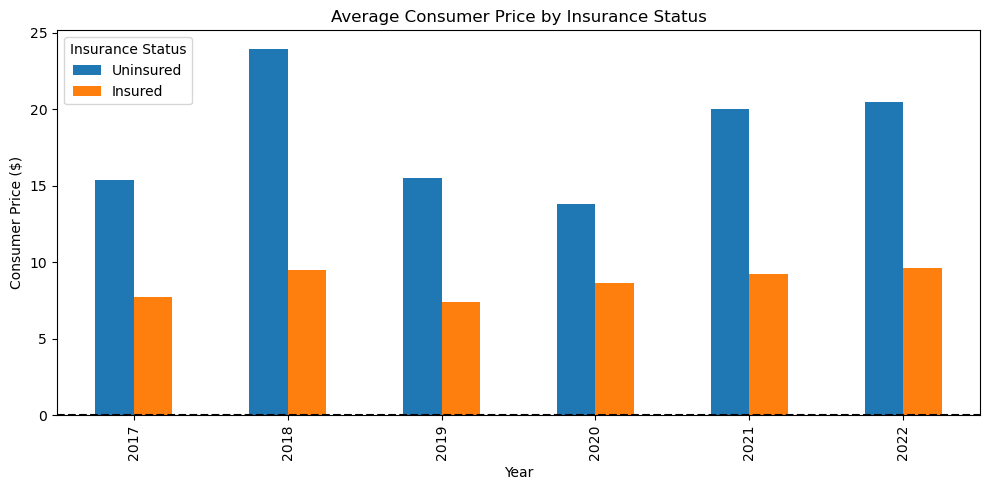

In [189]:
# Step 1: Group by insurance status and compute average consumer price
price_gap = df_merged.groupby(['YEAR', 'insured'])['consumer_price'].mean().reset_index()

# Step 2: Pivot for comparison
price_pivot = price_gap.pivot(index='YEAR', columns='insured', values='consumer_price')
price_pivot.columns = ['Uninsured', 'Insured']
price_pivot['Gap'] = price_pivot['Uninsured'] - price_pivot['Insured']
print(price_pivot)

# Step 3: Visualize the price gap
price_pivot[['Uninsured', 'Insured']].plot(kind='bar', figsize=(10, 5))
plt.title("Average Consumer Price by Insurance Status")
plt.ylabel("Consumer Price ($)")
plt.xlabel("Year")
plt.legend(title="Insurance Status")
plt.axhline(y=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

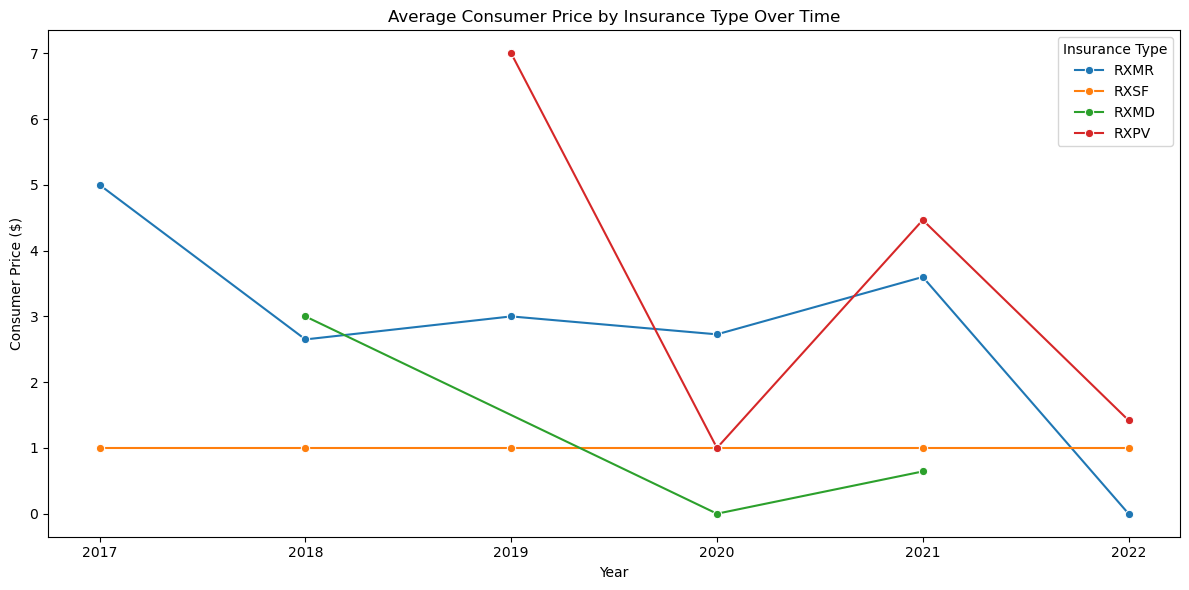

In [190]:
insurance_cols = ['RXSF', 'RXMR', 'RXMD', 'RXPV', 'RXVA', 'RXTR', 'RXOF', 
                  'RXSL', 'RXWC', 'RXOT']

# Step 1: Melt data to long format for easier grouping
insurance_long = df_merged.melt(
    id_vars=['YEAR', 'consumer_price'], 
    value_vars=insurance_cols,
    var_name='insurance_type', 
    value_name='covered'
)

# Step 2: Keep only rows where insurance is active
insurance_long = insurance_long[insurance_long['covered'] == 1]

# Step 3: Group by insurance type and year, calculate average price
avg_price_by_ins = insurance_long.groupby(['YEAR', 'insurance_type'])['consumer_price'].mean().reset_index()

# Step 4: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_by_ins, x='YEAR', y='consumer_price', hue='insurance_type', marker='o')
plt.title("Average Consumer Price by Insurance Type Over Time")
plt.ylabel("Consumer Price ($)")
plt.xlabel("Year")
plt.legend(title='Insurance Type')
plt.tight_layout()
plt.show()